# INF2178 A1-Yixin Chang (1005991651)

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# load the dataset
df = pd.read_excel("INF2178_A1_data.xlsx")
df.head()

,OCCUPANCY_DATE,ORGANIZATION_NAME,PROGRAM_ID,PROGRAM_NAME,SECTOR,PROGRAM_MODEL,OVERNIGHT_SERVICE_TYPE,PROGRAM_AREA,SERVICE_USER_COUNT,CAPACITY_TYPE,CAPACITY_ACTUAL_BED,OCCUPIED_BEDS,CAPACITY_ACTUAL_ROOM,OCCUPIED_ROOMS
0,2021-01-01,COSTI Immigrant Services,15371,COSTI North York West Hotel - Family Program,Families,Emergency,Motel/Hotel Shelter,COVID-19 Response,74,Room Based Capacity,NaN,NaN,29.0,26.0
1,2021-01-01,COSTI Immigrant Services,16211,COSTI North York West Hotel - Seniors Program,Mixed Adult,Emergency,Motel/Hotel Shelter,COVID-19 Response,3,Room Based Capacity,NaN,NaN,3.0,3.0
2,2021-01-01,COSTI Immigrant Services,16192,COSTI North York West Hotel Program - Men,Men,Emergency,Motel/Hotel Shelter,COVID-19 Response,24,Room Based Capacity,NaN,NaN,28.0,23.0
3,2021-01-01,COSTI Immigrant Services,16191,COSTI North York West Hotel Program - Mixed Adult,Mixed Adult,Emergency,Motel/Hotel Shelter,COVID-19 Response,25,Room Based Capacity,NaN,NaN,17.0,17.0
4,2021-01-01,COSTI Immigrant Services,16193,COSTI North York West Hotel Program - Women,Women,Emergency,Motel/Hotel Shelter,COVID-19 Response,13,Room Based Capacity,NaN,NaN,14.0,13.0


## Data Cleaning

In [36]:
# drop specified columns that are not used
df = df.drop(['OCCUPANCY_DATE','ORGANIZATION_NAME','PROGRAM_ID','PROGRAM_NAME',
              'SECTOR','OVERNIGHT_SERVICE_TYPE','PROGRAM_AREA'], axis=1)
df

,PROGRAM_MODEL,SERVICE_USER_COUNT,CAPACITY_TYPE,CAPACITY_ACTUAL_BED,OCCUPIED_BEDS,CAPACITY_ACTUAL_ROOM,OCCUPIED_ROOMS
0,Emergency,74,Room Based Capacity,NaN,NaN,29.0,26.0
1,Emergency,3,Room Based Capacity,NaN,NaN,3.0,3.0
2,Emergency,24,Room Based Capacity,NaN,NaN,28.0,23.0
3,Emergency,25,Room Based Capacity,NaN,NaN,17.0,17.0
4,Emergency,13,Room Based Capacity,NaN,NaN,14.0,13.0
...,...,...,...,...,...,...,...
50939,Emergency,6,Bed Based Capacity,20.0,6.0,NaN,NaN
50940,Emergency,23,Bed Based Capacity,23.0,23.0,NaN,NaN
50941,Transitional,13,Bed Based Capacity,14.0,13.0,NaN,NaN
50942,Emergency,10,Bed Based Capacity,10.0,10.0,NaN,NaN


In [37]:
# check if there are any missing values in the entire DataFrame
if df.isna().values.any():
    print("There are missing values in the DataFrame.")
    # check for missing values in the DataFrame
    missing_values = df.isna().sum()
    # display the count of missing values for each column
    print(missing_values)
else:
    print("There are no missing values in the DataFrame.")

There are missing values in the DataFrame.
PROGRAM_MODEL               2
SERVICE_USER_COUNT          0
CAPACITY_TYPE               0
CAPACITY_ACTUAL_BED     18545
OCCUPIED_BEDS           18545
CAPACITY_ACTUAL_ROOM    32399
OCCUPIED_ROOMS          32399
dtype: int64


## EDA

In [38]:
# generate descriptive statistics for current df
df.describe()

,SERVICE_USER_COUNT,CAPACITY_ACTUAL_BED,OCCUPIED_BEDS,CAPACITY_ACTUAL_ROOM,OCCUPIED_ROOMS
count,50944.000000,32399.000000,32399.000000,18545.000000,18545.000000
mean,45.727171,31.627149,29.780271,55.549259,52.798598
std,53.326049,27.127682,26.379416,59.448805,58.792954
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,15.000000,15.000000,14.000000,19.000000,16.000000
50%,28.000000,25.000000,23.000000,35.000000,34.000000
75%,51.000000,43.000000,41.000000,68.000000,66.000000
max,339.000000,234.000000,234.000000,268.000000,268.000000


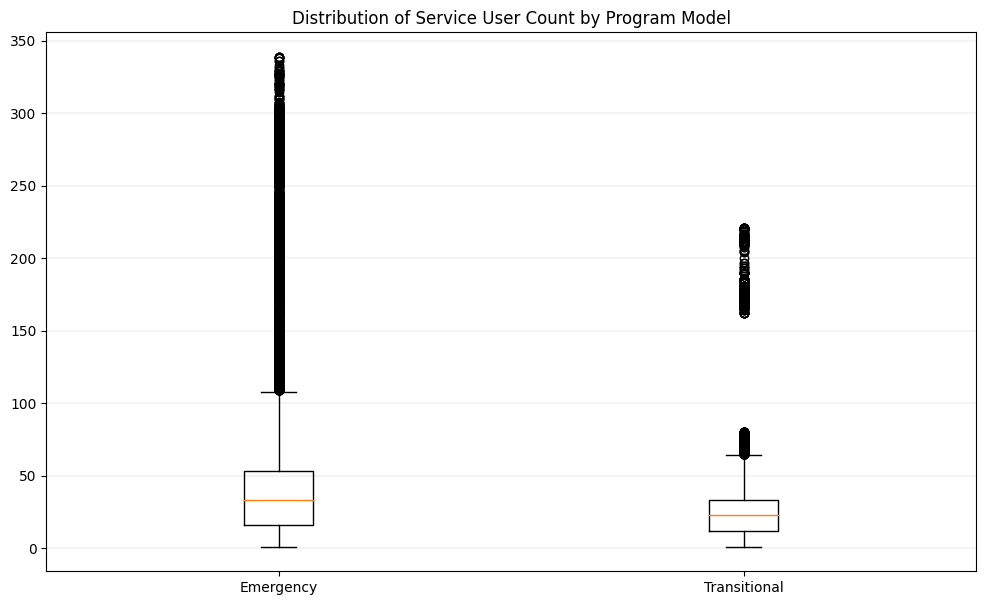

In [39]:
# Boxplot for distribution of service user count by program model

# create dataframes of service user count for each program model
service_emergency = df[df['PROGRAM_MODEL'] == 'Emergency']['SERVICE_USER_COUNT']
service_transitional = df[df['PROGRAM_MODEL'] == 'Transitional']['SERVICE_USER_COUNT']

# visualize service user count distribution for all program model
fig, ax = plt.subplots(figsize=(12, 7))

# add major gridlines in the y-axis
ax.grid(color='grey', axis='y', linestyle='-', linewidth=0.25, alpha=0.5)

# set plot title
ax.set_title('Distribution of Service User Count by Program Model')

dataset = [service_emergency, service_transitional]

# set program model names as labels for the boxplot
labels = ['Emergency', 'Transitional']
ax.boxplot(dataset, labels=labels)
plt.show()

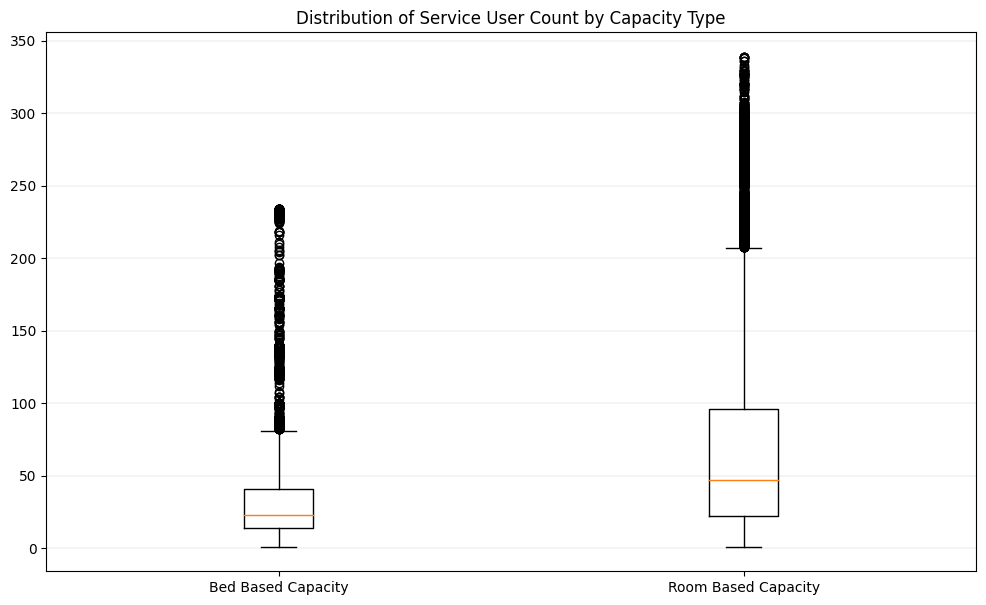

In [40]:
# Boxplot for distribution of service user count by capacity type

# create dataframes of service user count for each capacity type
service_bed = df[df['CAPACITY_TYPE'] == 'Bed Based Capacity']['SERVICE_USER_COUNT']
service_room = df[df['CAPACITY_TYPE'] == 'Room Based Capacity']['SERVICE_USER_COUNT']

# visualize service user count distribution for all capacity types
fig, ax = plt.subplots(figsize=(12, 7))

# add major gridlines in the y-axis
ax.grid(color='grey', axis='y', linestyle='-', linewidth=0.25, alpha=0.5)

# Set plot title
ax.set_title('Distribution of Service User Count by Capacity Type')

dataset = [service_bed, service_room]

# set capacity types as labels for the boxplot
labels = ['Bed Based Capacity', 'Room Based Capacity']
ax.boxplot(dataset, labels=labels)
plt.show()

Add three columns to the dataframe:
* OCCUPANCY_RATE_BED: the occupancy rate for beds
* OCCUPANCY_RATE_ROOM: the occupancy rate for rooms
* OCCUPANCY_RATE: combine above two columns based on the capacity type, and this column is used for comparing occupancy rate distribution when considering program model.


In [41]:
# calculate the occupancy rate for beds
df['OCCUPANCY_RATE_BED'] = df['OCCUPIED_BEDS'] / df['CAPACITY_ACTUAL_BED']
# calculate the occupancy rate for rooms
df['OCCUPANCY_RATE_ROOM'] = df['OCCUPIED_ROOMS'] / df['CAPACITY_ACTUAL_ROOM']
# create a new column containing occupancy rate based on capacity type
df['OCCUPANCY_RATE'] = df.apply(lambda x: x['OCCUPANCY_RATE_BED']
                                if x['CAPACITY_TYPE'] == 'Bed Based Capacity'
                                else x['OCCUPANCY_RATE_ROOM'], axis=1)
df

,PROGRAM_MODEL,SERVICE_USER_COUNT,CAPACITY_TYPE,CAPACITY_ACTUAL_BED,OCCUPIED_BEDS,CAPACITY_ACTUAL_ROOM,OCCUPIED_ROOMS,OCCUPANCY_RATE_BED,OCCUPANCY_RATE_ROOM,OCCUPANCY_RATE
0,Emergency,74,Room Based Capacity,NaN,NaN,29.0,26.0,NaN,0.896552,0.896552
1,Emergency,3,Room Based Capacity,NaN,NaN,3.0,3.0,NaN,1.000000,1.000000
2,Emergency,24,Room Based Capacity,NaN,NaN,28.0,23.0,NaN,0.821429,0.821429
3,Emergency,25,Room Based Capacity,NaN,NaN,17.0,17.0,NaN,1.000000,1.000000
4,Emergency,13,Room Based Capacity,NaN,NaN,14.0,13.0,NaN,0.928571,0.928571
...,...,...,...,...,...,...,...,...,...,...
50939,Emergency,6,Bed Based Capacity,20.0,6.0,NaN,NaN,0.300000,NaN,0.300000
50940,Emergency,23,Bed Based Capacity,23.0,23.0,NaN,NaN,1.000000,NaN,1.000000
50941,Transitional,13,Bed Based Capacity,14.0,13.0,NaN,NaN,0.928571,NaN,0.928571
50942,Emergency,10,Bed Based Capacity,10.0,10.0,NaN,NaN,1.000000,NaN,1.000000


EDA of occupancy rate for each program model

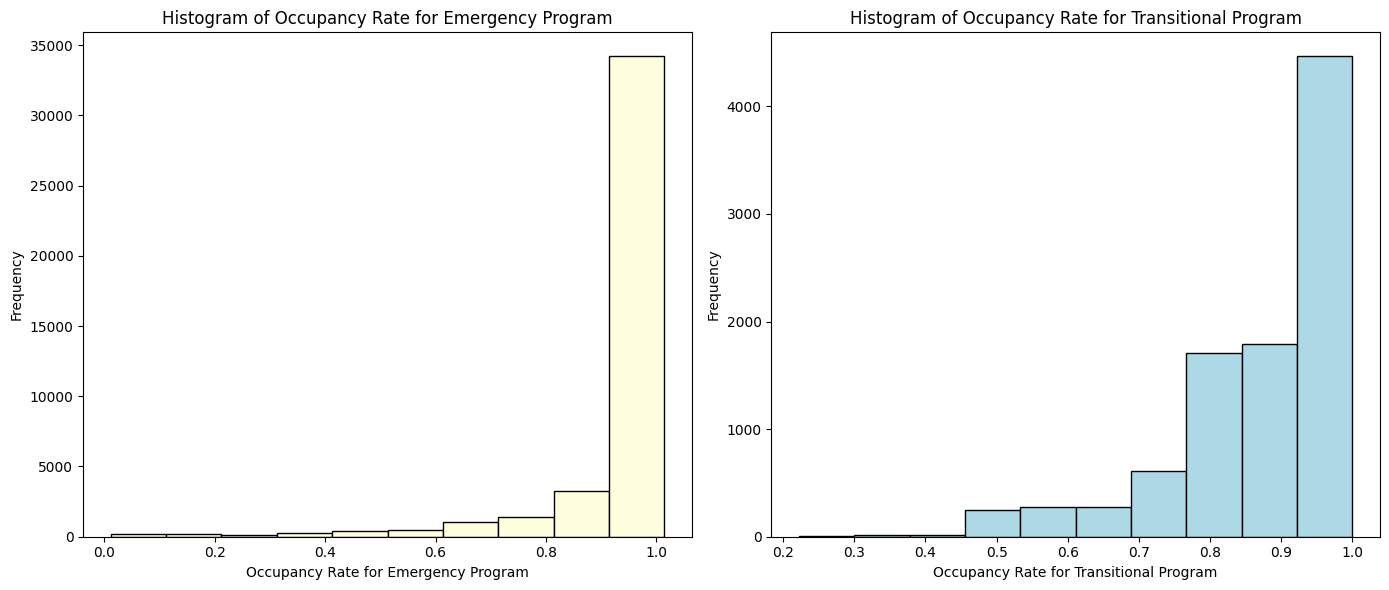

In [42]:
# Program Model: Emergency vs Transitional

# create dataframes of occupancy rate for each program model
rate_emergency = df[df['PROGRAM_MODEL'] == 'Emergency']['OCCUPANCY_RATE']
rate_transitional = df[df['PROGRAM_MODEL'] == 'Transitional']['OCCUPANCY_RATE']

# plot histograms
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# plot histogram of occupancy rate for emergency program
axs[0].hist(rate_emergency, color='lightyellow', edgecolor='black')
axs[0].set_title('Histogram of Occupancy Rate for Emergency Program')
axs[0].set_xlabel('Occupancy Rate for Emergency Program')
axs[0].set_ylabel('Frequency')

# plot histogram of occupancy rate for transitional program
axs[1].hist(rate_transitional, color='lightblue', edgecolor='black')
axs[1].set_title('Histogram of Occupancy Rate for Transitional Program')
axs[1].set_xlabel('Occupancy Rate for Transitional Program')
axs[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [43]:
# this function gives us summary statistics for a dataframe
def get_summary_statistics(df):

    mean = np.round(np.mean(df), 2)
    median = np.round(np.median(df), 2)
    min_value = np.round(df.min(), 2)
    max_value = np.round(df.max(), 2)
    quartile_1 = np.round(df.quantile(0.25), 2)
    quartile_3 = np.round(df.quantile(0.75), 2)

    # Interquartile range
    iqr = np.round(quartile_3 - quartile_1, 2)

    print('Min: %s' % min_value)
    print('Mean: %s' % mean)
    print('Max: %s' % max_value)
    print('25th percentile: %s' % quartile_1)
    print('Median: %s' % median)
    print('75th percentile: %s' % quartile_3)
    print('Interquartile range (IQR): %s' % iqr)

# Summary Statistics for dataframes: rate_emergency and rate_transitinal

print('rate_emergency summary statistics:')
get_summary_statistics(rate_emergency)

print('\n')

print('rate_transitional summary statistics:')
get_summary_statistics(rate_transitional)

rate_emergency summary statistics:
Min: 0.01
Mean: 0.94
Max: 1.01
25th percentile: 0.95
Median: 1.0
75th percentile: 1.0
Interquartile range (IQR): 0.05


rate_transitional summary statistics:
Min: 0.22
Mean: 0.88
Max: 1.0
25th percentile: 0.82
Median: 0.92
75th percentile: 1.0
Interquartile range (IQR): 0.18


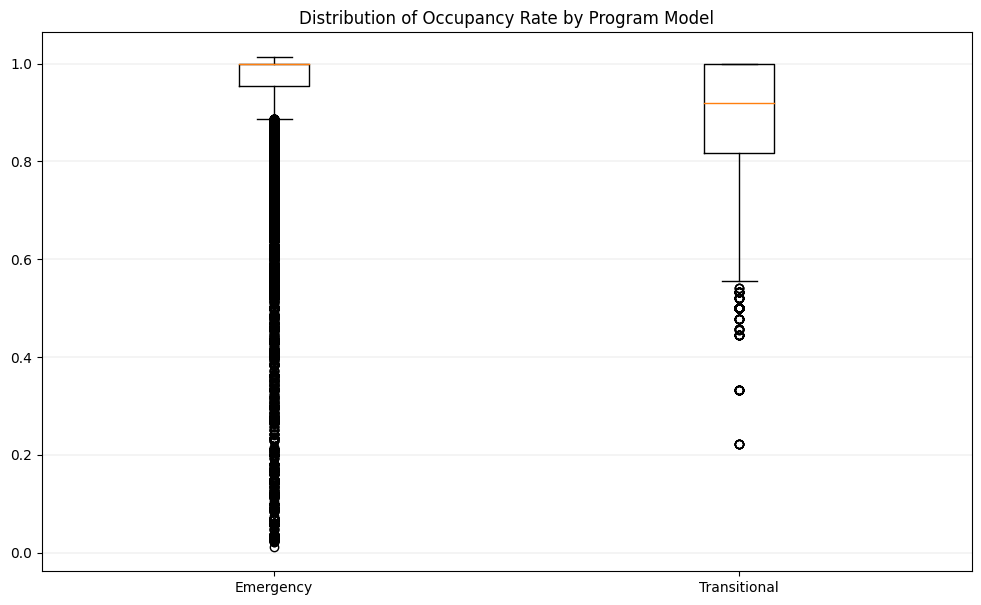

In [44]:
# Boxplot for distribution of occupancy rate by program model

# visualize occupancy rate distribution for all program models
fig, ax = plt.subplots(figsize=(12, 7))

# add major gridlines in the y-axis
ax.grid(color='grey', axis='y', linestyle='-', linewidth=0.25, alpha=0.5)

# set plot title
ax.set_title('Distribution of Occupancy Rate by Program Model')

dataset = [rate_emergency, rate_transitional]

# set program model names as labels for the boxplot
labels = ['Emergency', 'Transitional']
ax.boxplot(dataset, labels=labels)
plt.show()

EDA of occupancy rate for each capacity type

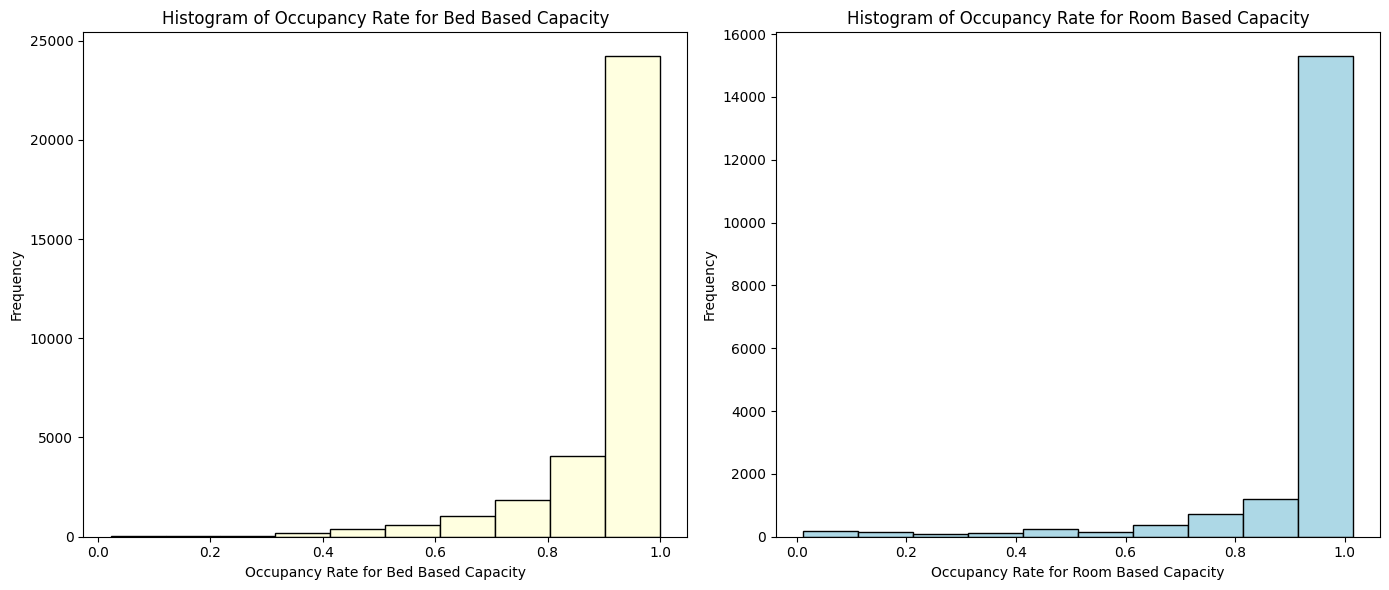

In [45]:
# Capacity type: Bed based capacity vs Room based capacity

# plot histograms
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# plot histogram of occupancy rate for bed based capacity
axs[0].hist(df['OCCUPANCY_RATE_BED'], color='lightyellow', edgecolor='black')
axs[0].set_title('Histogram of Occupancy Rate for Bed Based Capacity')
axs[0].set_xlabel('Occupancy Rate for Bed Based Capacity')
axs[0].set_ylabel('Frequency')

# plot histogram of occupancy rate for room based capacity
axs[1].hist(df['OCCUPANCY_RATE_ROOM'], color='lightblue', edgecolor='black')
axs[1].set_title('Histogram of Occupancy Rate for Room Based Capacity')
axs[1].set_xlabel('Occupancy Rate for Room Based Capacity')
axs[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [46]:
# Summary Statistics for columns: OCCUPANCY_RATE_BED and OCCUPANCY_RATE_ROOM

# create dataframes of occupancy rate for each capacity type
rate_bed = df[df['CAPACITY_TYPE'] == 'Bed Based Capacity']['OCCUPANCY_RATE_BED']
rate_room = df[df['CAPACITY_TYPE'] == 'Room Based Capacity']['OCCUPANCY_RATE_ROOM']

print('OCCUPANCY_RATE_BED summary statistics:')
get_summary_statistics(rate_bed)

print('\n')

print('OCCUPANCY_RATE_ROOM summary statistics:')
get_summary_statistics(rate_room)

OCCUPANCY_RATE_BED summary statistics:
Min: 0.02
Mean: 0.93
Max: 1.0
25th percentile: 0.9
Median: 1.0
75th percentile: 1.0
Interquartile range (IQR): 0.1


OCCUPANCY_RATE_ROOM summary statistics:
Min: 0.01
Mean: 0.93
Max: 1.01
25th percentile: 0.96
Median: 1.0
75th percentile: 1.0
Interquartile range (IQR): 0.04


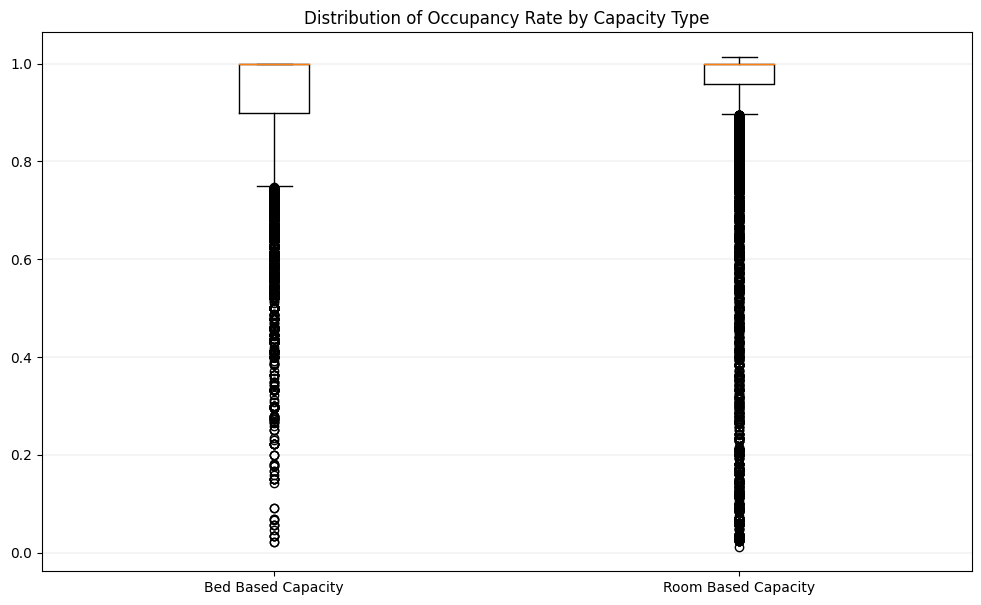

In [47]:
# Boxplot for distribution of occupancy rate by capacity type

# visualize occupancy rate distribution for all capacity types
fig, ax = plt.subplots(figsize=(12, 7))

# add major gridlines in the y-axis
ax.grid(color='grey', axis='y', linestyle='-', linewidth=0.25, alpha=0.5)

# Set plot title
ax.set_title('Distribution of Occupancy Rate by Capacity Type')

dataset = [rate_bed, rate_room]

# Set capacity type names as labels for the boxplot
labels = ['Bed Based Capacity', 'Room Based Capacity']
ax.boxplot(dataset, labels=labels)
plt.show()

## t test

In [48]:
# t test: Program model

# check variance
var_emergency = rate_emergency.var()
var_transitional = rate_transitional.var()
print("Variance for rate_emergency:", var_emergency)
print("Variance for rate_transitional:", var_transitional)

if var_emergency == var_transitional:
  print("The variance are equal, so we use 2 sample t-test.")
  print("\n")
  print("Perform 2 sample t-test:")
  # 2 sample t-test (equal variance)
  t_stat, p_val = stats.ttest_ind(rate_emergency, rate_transitional)
else:
  print("The variance are not equal, so we use welch's t-test.")
  print("\n")
  print("Perform Welch's t-test:")
  # welch's t-test (unequal variance)
  t_stat, p_val = stats.ttest_ind(rate_emergency, rate_transitional, equal_var = False)

# print results
print("t-statistic = " + str(t_stat))
print("p-value = " + str(p_val))

# significance level
alpha = 0.05

if p_val < 0.05:
  print("There is a significant difference in occupancy rate between Emergency program and Transitional program.")
  print("We reject the null hypothesis H0.")
else:
  print("There is not a significant difference in occupancy rate between Emergency program and Transitional program.")
  print("We do not reject the null hypothesis H0.")

Variance for rate_emergency: 0.019198429187144806
Variance for rate_transitional: 0.016505161833043135
The variance are not equal, so we use welch's t-test.


Perform Welch's t-test:
t-statistic = 40.981115372199206
p-value = 0.0
There is a significant difference in occupancy rate between Emergency program and Transitional program.
We reject the null hypothesis H0.


In [49]:
# t test: Capacity type

# check variance
var_bed = rate_bed.var()
var_room = rate_room.var()
print("Variance for rate_bed:", var_bed)
print("Variance for rate_room:", var_room)

if var_bed == var_room:
  print("The variance are equal, so we use 2 sample t-test.")
  print("\n")
  print("Perform 2 sample t-test:")
  # 2 sample t-test (equal variance)
  t_stat, p_val = stats.ttest_ind(rate_bed, rate_room)
else:
  print("The variance are not equal, so we use welch's t-test.")
  print("\n")
  print("Perform Welch's t-test:")
  # welch's t-test (unequal variance)
  t_stat, p_val = stats.ttest_ind(rate_bed, rate_room, equal_var = False)

# print results
print("t-statistic = " + str(t_stat))
print("p-value = " + str(p_val))

# significance level
alpha = 0.05

if p_val < 0.05:
  print("There is a significant difference in occupancy rate between bed based capacity and room based capacity.")
  print("We reject the null hypothesis H0.")
else:
  print("There is not a significant difference in occupancy rate between bed based capacity and room based capacity.")
  print("We do not reject the null hypothesis H0.")

Variance for rate_bed: 0.015021354257831214
Variance for rate_room: 0.026647630551207238
The variance are not equal, so we use welch's t-test.


Perform Welch's t-test:
t-statistic = -4.498751771925636
p-value = 6.860477551487939e-06
There is a significant difference in occupancy rate between bed based capacity and room based capacity.
We reject the null hypothesis H0.
